# Model Testing Notebook
---

[Authors] ERGM

---

A Notebook to showing an example of testing an equation in PyFolding. Once you have tested it here you can add it to your models.py from the PyFolding installation and setup PyFolding again to incorporate it into your local copy. 



In [1]:
# Load up pyfolding, etc.
%matplotlib inline
import pyfolding
from pyfolding import models

# let's use some other libraries also
import matplotlib.pyplot as plt
import numpy as np

# Command imports pyfolding models
from pyfolding.models import *


<IPython.core.display.Javascript object>

PyFolding: Jupyter autoscrolling has been disabled


In [2]:
# loading some data - The kinetics of each protein is in one .csv as per the example .csv above
pth = "/Users/ergm/Dropbox/AlanLoweCollaboration/Datasets/GankyrinFolding"
GankyrinChevron = pyfolding.read_kinetic_data(pth,"GankyrinWTChevron.csv")

In [3]:
# let's give this dataset a good name
GankyrinChevron.ID = 'Gankyrin WT'

In [4]:
pyfolding.set_temperature(25.0)

Set temperature to 25.00°C
(NOTE: Careful, this sets the temperature for all subsequent calculations)


In [19]:
# This is a test model.  It contains everything you need to fit in pyfolding

# only change the name (in blue)

class TestEq(core.FitModel):
    
# This bit is editted out between the """ """ . It just explains what the equation is and where it came from    
    
    """ Two state chevron with moving transition state.
    Second order polynomial.

    k_u = k_u^{H_2O} * \exp(m_{ku}*x) * \exp(m_{ku}^' * x^2)
    k_f = k_f^{H_2O} * \exp(m_{kf}*x) * \exp(m_{kf}^' * x^2)

    k_{obs} = k_u + k_f

    Notes:
        Ternstrom et al. From snapshot to movie: phi analysis
        of protein folding transition states taken one step
        further.
        PNAS (1999) vol. 96 (26) pp. 14854-9
        
    """
    
# In this bit only touch the "self.default_params" which are the initial parameters for the model to start fitting with.
    
    def __init__(self):
        core.FitModel.__init__(self)
        fit_args = self.fit_func_args
        self.params = tuple( [(fit_args[i],i) for i in xrange(len(fit_args))] )
        self.default_params = np.array([1, 1.3480, 100, 1., -1])
        self.verified = True
        
# This is the equation which will be fit to

    def fit_func(self, x, ku, mu, kf, mf, m_prime):
        k_obs = (ku * (np.exp(mu*x))*(np.exp(m_prime*x*x))) + (kf * (np.exp(mf*x)) * (np.exp(m_prime*x*x)))
        return k_obs

    def error_func(self, y):
        return np.log(y)
    
# This bit is the equation which will be printed when you ask it too in PyFolding    

    @property
    def equation(self):
        return r'k_u = k_u^{H_2O} \cdot \exp(m_{ku}*x) \cdot \exp(m^{\'} x^2) \\ \
                k_f = k_f^{H_2O} \cdot \exp(m_{kf}*x) \cdot \exp(m^{\'} x^2) \\ \
                k_{obs} = k_u + k_f'

/Users/ergm/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in log


 Fitting results 
ID: Gankyrin WT
Model: TestEq
Method: scipy.optimize.curve_fit 

ku: 0.00000 ± 0.00000
mu: 4.98448 ± 0.08190
kf: 8.64128 ± 0.38327
mf: 0.19051 ± 0.03356
m_prime: -0.27314 ± 0.00577
--------------------------------------------------
R^2: 0.86662


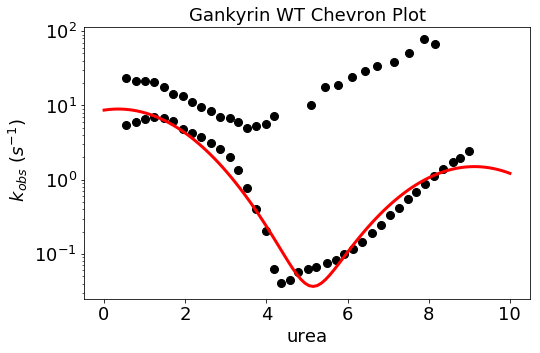

In [20]:
# Lets fit some data and see if the model works!

GankyrinChevron.fit_func = TestEq
GankyrinChevron.fit()
GankyrinChevron.plot()

NoteBook End